## Image stitching

Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image. OpenCV has its own implementation named `Stitcher()`.

In [ ]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from google.colab import drive
from pathlib import Path
import requests

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-0o-8o-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urll

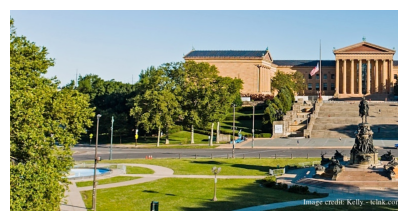

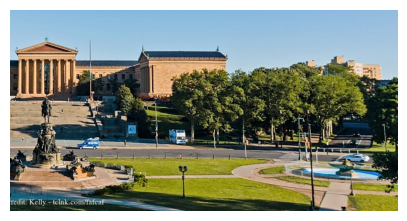

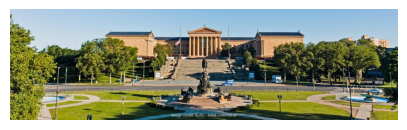

In [ ]:
# Download sample images from the Internet
def download_image(url, file_name):
  img_data = requests.get(url, verify=False).content
  with open(file_name, 'wb') as handler:
    handler.write(img_data)

urls = ["https://drive.google.com/uc?id=1ZJFByU7NxK4ZrxQXhVmTO1YNu61hGYjE",
        "https://drive.google.com/uc?id=1ZN33zQc2B6Yd07-nadqdvoGedGApXuYv",
        "https://drive.google.com/uc?id=1ZVBzujMUPuMLnh2_2WNeplSUSlik2vt9",]
file_names = ["philly1.png","philly2.png","complete_philly.png"]

images = []
for url, file_name in zip(urls, file_names):
  download_image(url, file_name)
  image = cv2.imread(file_name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  plt.axis("off")
  images.append(image)

3
2


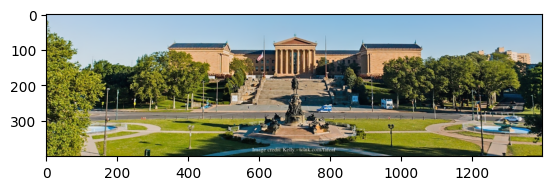

In [ ]:
# Remove the last element
print(len(images))
images.pop(-1)
print(len(images))

stitchy=cv2.Stitcher.create()
(status,output)=stitchy.stitch(images)

# Check if the sticking procedure was successful
if status == cv2.STITCHER_OK:
  stitching_completed = True
  plt.imshow(output)
else:
  print("There was an error stitching the images")